# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [31]:
from sklearn.cluster import KMeans

In [32]:
kmeans_8 =KMeans(n_clusters=8)

In [49]:
clusters = kmeans_8.fit(X)

In [34]:
y1_pred=kmeans_8.predict(X)

In [35]:
from sklearn.metrics import silhouette_score

In [36]:
print ('Modelo 1 - Hierarchical : Silhouette Score:{}'.format(silhouette_score(X, y1_pred)))

Modelo 1 - Hierarchical : Silhouette Score:0.5398971441034137


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [37]:
kmeans_5 =KMeans(n_clusters=5)

In [50]:
clusters = kmeans_5.fit(X)

In [39]:
y2_pred=kmeans_5.predict(X)

In [40]:
print ('Modelo 1 - Hierarchical : Silhouette Score:{}'.format(silhouette_score(X, y2_pred)))

Modelo 1 - Hierarchical : Silhouette Score:0.5489993239795691


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [41]:
kmeans_3 =KMeans(n_clusters=3)

In [51]:
clusters = kmeans_3.fit(X)

In [43]:
y3_pred=kmeans_3.predict(X)

In [44]:
print ('Modelo 1 - Hierarchical : Silhouette Score:{}'.format(silhouette_score(X, y3_pred)))

Modelo 1 - Hierarchical : Silhouette Score:0.5711381937868844


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [53]:
from yellowbrick.cluster import KElbowVisualizer

from sklearn import cluster, datasets

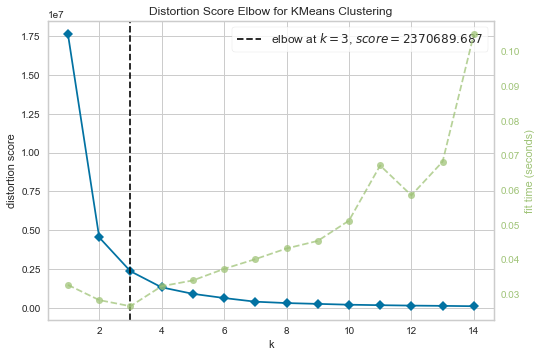

In [54]:
model=cluster.KMeans()

visual = KElbowVisualizer(model, k=(1, 15))
visual.fit(X)

visual.poof();

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [55]:
single=cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
single.fit(X)

y3_pred=single.labels_

silhouette_score(X, y3_pred)

0.5393938960075034

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [56]:
X.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [57]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

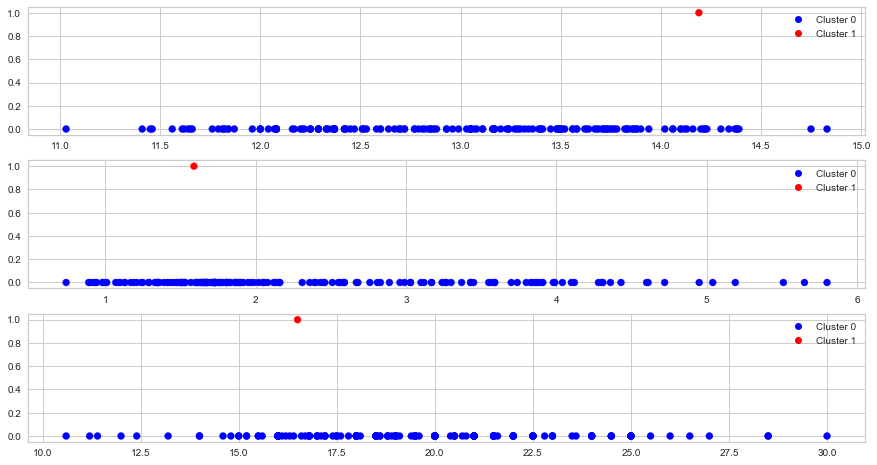

In [58]:
fig,ax = plt.subplots(3, 1, figsize=(15, 8))

colors=np.array(['blue', 'red'])

legend_e=[Line2D([0],[0], color=c, marker='o', linestyle='',
                 label='Cluster {}'.format(i))  for i,c in enumerate(colors)]

ax[0].scatter(X['alcohol'], y3_pred, color=colors[y3_pred])
ax[0].legend(handles=legend_e, loc='upper right')

ax[1].scatter(X['malic_acid'], y3_pred, color=colors[y3_pred])
ax[1].legend(handles=legend_e, loc='upper right');

ax[2].scatter(X['alcalinity_of_ash'], y3_pred, color=colors[y3_pred])
ax[2].legend(handles=legend_e, loc='upper right');

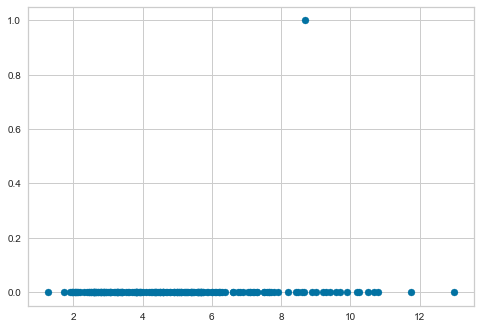

In [59]:
model=cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
model.fit(X)

y3_pred=model.labels_

plt.scatter(X['color_intensity'], y3_pred);

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [60]:
from sklearn.decomposition import PCA

In [61]:
pca = PCA()

pca.fit(X)

print(X.shape)

pca.explained_variance_ratio_

(178, 13)


array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05, 5.02173562e-05,
       1.23636847e-05, 8.46213034e-06, 2.80681456e-06, 1.52308053e-06,
       1.12783044e-06, 7.21415811e-07, 3.78060267e-07, 2.12013755e-07,
       8.25392788e-08])

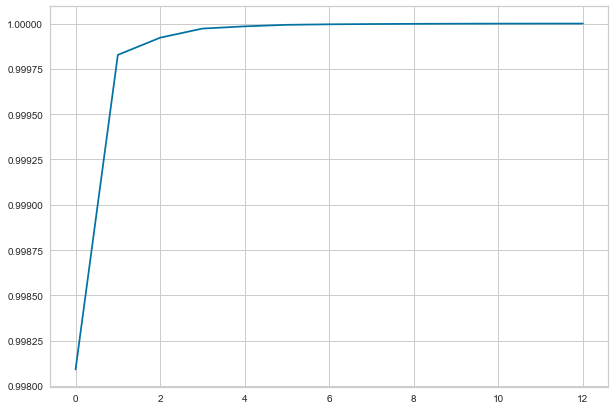

In [62]:
plt.figure(figsize=(10, 7))

plt.plot(np.cumsum(pca.explained_variance_ratio_));

In [63]:
pca = PCA(n_components=2).fit_transform(X)

pca_df = pd.DataFrame(pca, columns=[f'pc_{i+1}' for i in range(2)])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


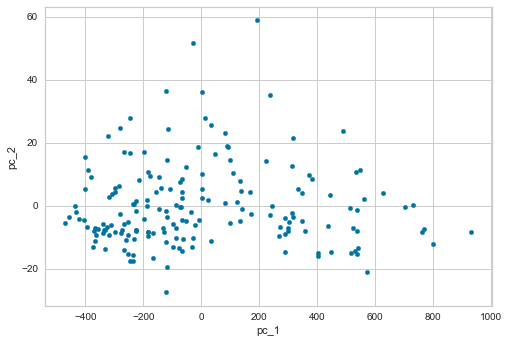

In [64]:
pca_df.plot.scatter(x='pc_1', y='pc_2');

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

In [65]:
from sklearn.manifold import TSNE